# Exploratory Data Analysis

This notebook file aims to present an exploratory data analysis of the following problem: house pricing. This analysis is divided into five parts:

1. Exploratory analysis
    * Data structure
    * Descritive statistics
2. Data modeling
4. Model Evaluation
5. Conclusions

## Exploratory Analysis

### Data structure

In [1]:
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import mean_absolute_error
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math 
from sklearn.metrics import r2_score
import plotly.express as px


In [2]:
df = pd.read_csv("ames_train.csv", sep=";")

In this part I take a look at the dataset to understand the general data structure, the dataset size, the columns formats, the number of features, their type (i.e. categorical or numerical) etc.

In [3]:
df.head()

,Unnamed: 0,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,40000,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,40001,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,40002,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,40003,1039,114000,70,RL,80.0,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,40004,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1000 non-null   int64  
 1   PID              1000 non-null   int64  
 2   area             1000 non-null   int64  
 3   price            1000 non-null   int64  
 4   MS.SubClass      1000 non-null   int64  
 5   MS.Zoning        1000 non-null   object 
 6   Lot.Frontage     833 non-null    float64
 7   Lot.Area         1000 non-null   int64  
 8   Street           1000 non-null   object 
 9   Alley            67 non-null     object 
 10  Lot.Shape        1000 non-null   object 
 11  Land.Contour     1000 non-null   object 
 12  Utilities        1000 non-null   object 
 13  Lot.Config       1000 non-null   object 
 14  Land.Slope       1000 non-null   object 
 15  Neighborhood     1000 non-null   object 
 16  Condition.1      1000 non-null   object 
 17  Condition.2    

Then I make some plots to visualize the relationship between some of the features, since there are too many in this case. I choose some of them based on my general knowledge of the problem. For example, in the plot below I picked some features that I assume to be correlated to the target, just to see superficially how the points are distributed. We can clearly see that the price and area are directly proportional and so does any other  measurement related to the size of the house (like front porch or Lot.Area). From theses plots we can also clearly see that there are some missing data (probably null or zero values), so this must be treated before we build the model.

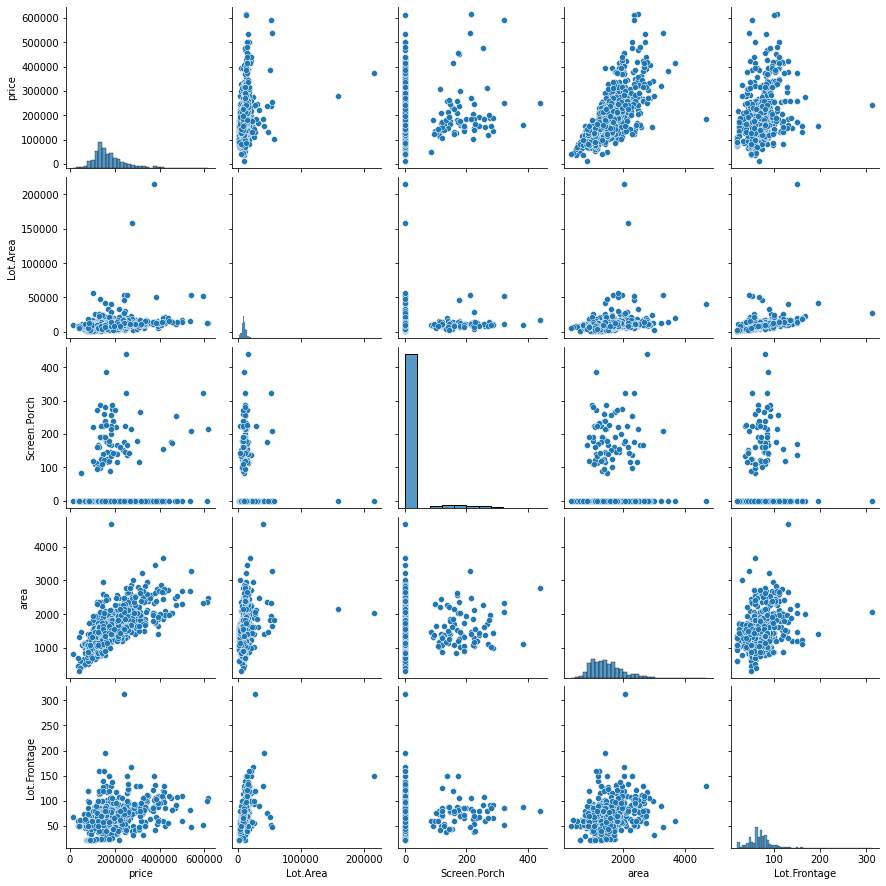

In [4]:
sns.pairplot(df[['price', 'Lot.Area', 'Screen.Porch', 'area', 'Lot.Frontage']])

A more specific plot of area vs price can reveal important data. We already know that the greater the area the higher the price, but depending on the zone in which the house is located, the price escalates more rapidly, for instance, for zone RM the prices increase faster than the FV zone.

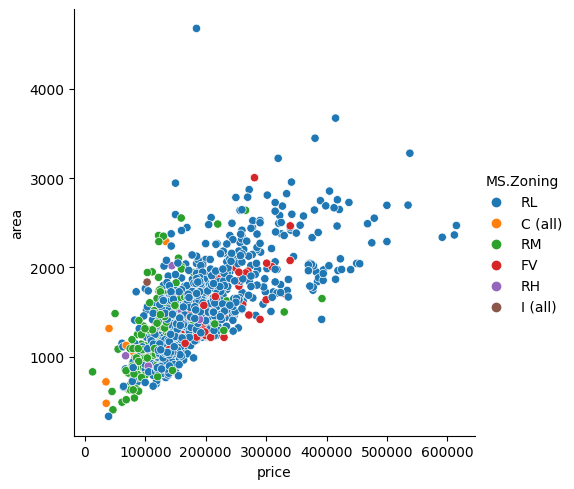

In [5]:
sns.relplot(x = 'price', y='area', hue='MS.Zoning', data=df)

In [34]:
corr.index

Index(['price', 'Overall.Qual', 'area', 'Total.Bsmt.SF', 'X1st.Flr.SF',
       'Garage.Cars', 'Garage.Area', 'Year.Built', 'Year.Remod.Add',
       'Garage.Yr.Blt', 'Mas.Vnr.Area', 'Full.Bath', 'TotRms.AbvGrd',
       'Fireplaces', 'BsmtFin.SF.1', 'Wood.Deck.SF', 'Lot.Frontage',
       'Bsmt.Full.Bath', 'Half.Bath', 'Open.Porch.SF', 'Lot.Area',
       'X2nd.Flr.SF', 'Bsmt.Unf.SF', 'Bedroom.AbvGr', 'Screen.Porch',
       'Pool.Area', 'Mo.Sold', 'X3Ssn.Porch', 'Unnamed: 0', 'PID', 'Misc.Val',
       'Yr.Sold', 'BsmtFin.SF.2', 'Low.Qual.Fin.SF', 'Bsmt.Half.Bath',
       'MS.SubClass', 'Kitchen.AbvGr', 'Overall.Cond', 'Enclosed.Porch'],
      dtype='object')

The plot below shows a heatmap of the correlation between all the features in the dataset. It is important to highlight that this is a Pearson correlation, so it calculates the linear correlation between the variables ( if a feature has other type of correlation with the target, like a higher degree polynomial type, it will be simplified by a straight line). The high intensity blue squares represent a strong positive correlation and a directly proportional relationship, whilst the redder squares symbolizes a inversely proportional relationship. The lighter the color of the square the weaker the correlation between variables.

We can see that many of the squares are blue, this can be used further to stablish a threshold to filter the most relevant features.

<AxesSubplot:>

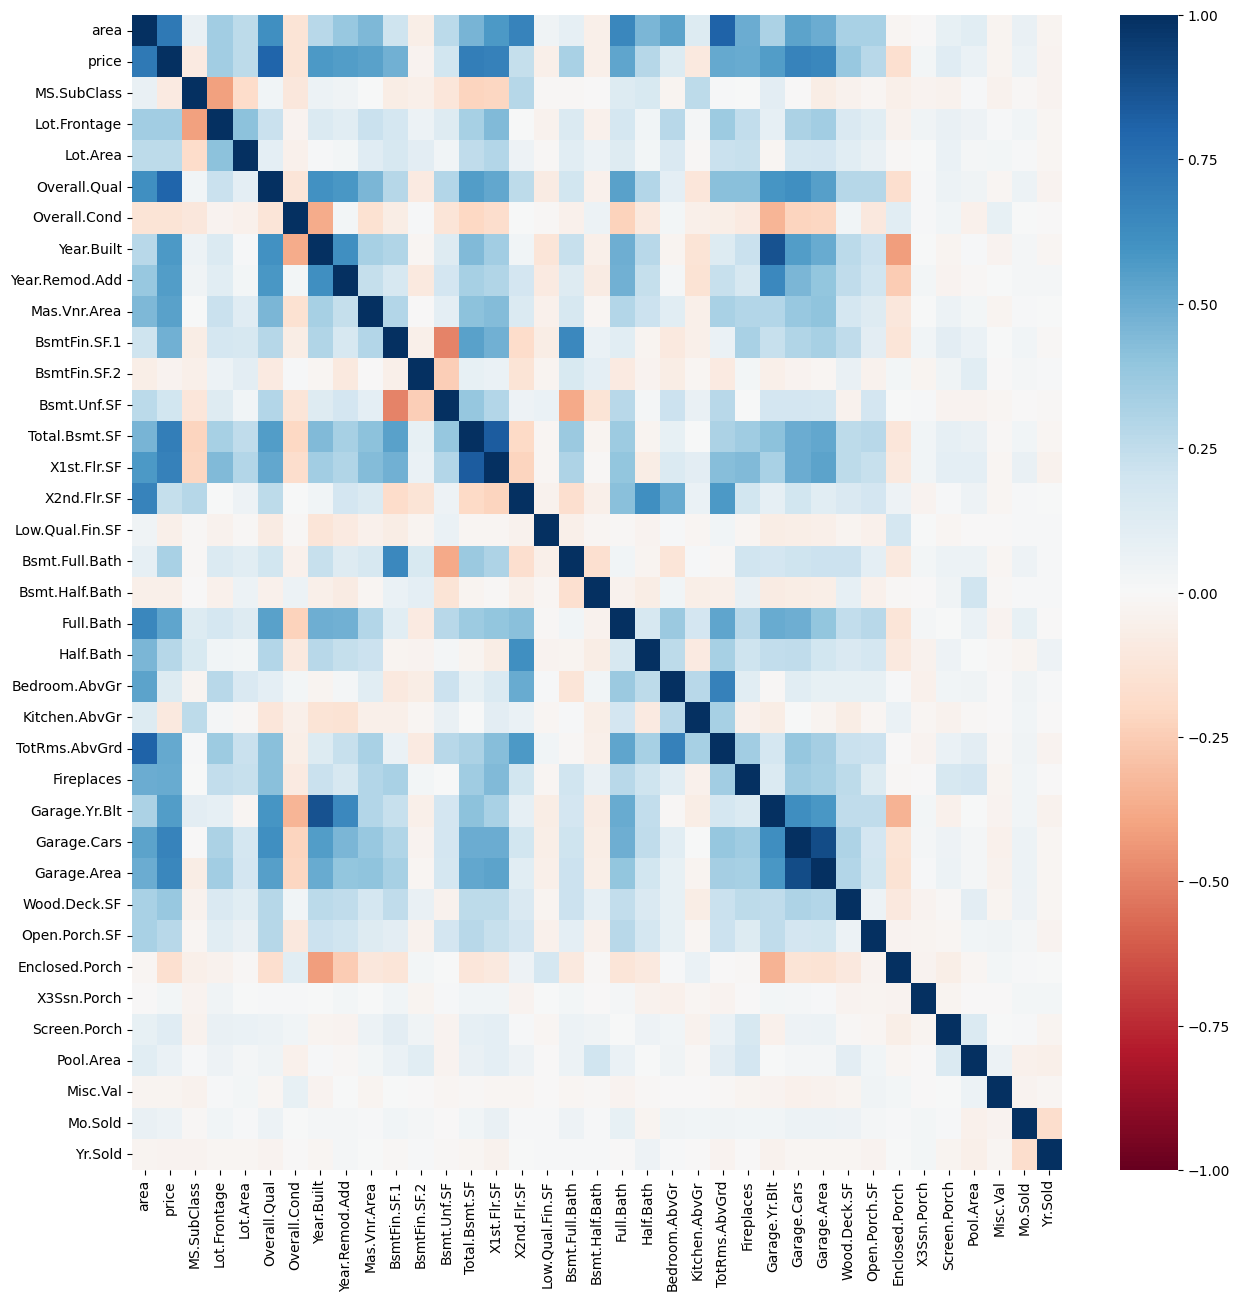

In [44]:
plt.figure(figsize=(15,15))
df = df.iloc[: , 2:]
sns.heatmap(df.corr(), cmap="RdBu",vmin=-1, vmax=1)


The last plot I used a violin plot to see the distribution of prices in general. We can see that the curve is right skewed, meaning that most of house prices concentrate in the range USS 100K to 200K with a few exceptions of much expensive houses.

<AxesSubplot:>

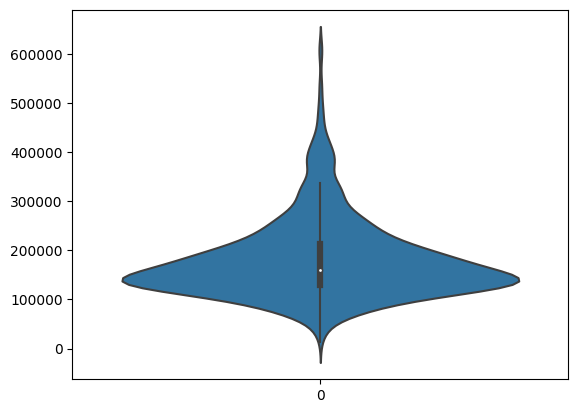

In [48]:
sns.violinplot(data=df['price'])

## Data Modeling

A good prediction model fit for this problem is a linear regression, since we have already observed a linear relationship between some features and the target. I first filter only the numerical features then the most correlated ones using a threshold of 0.2 .

For the missing values, I opted for filling them with zeros, although the best practice in this case would be to fill them with the mean or median value of the associated column, with the exception of year.

In [186]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
nan_columns = newdf.loc[:, newdf.isna().any()]
newdf.fillna(0, inplace=True)
corr = newdf.corr()['price'].abs().sort_values(ascending=False)
newdf.isnull().sum().sum()



0

In [170]:
corr = pd.DataFrame(corr)

In [171]:
corr = corr[corr.price < 0.3].copy()

In [173]:
newdf=newdf.drop(corr.index, axis=1)

In [174]:
x = newdf.drop(['price'], axis=1).values
y = newdf['price'].values

In [175]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=0)
ml=LinearRegression()
ml.fit(x_train,y_train)
y_pred = ml.predict(x_test)


## Model evaluation

In [176]:
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
rs = r2_score(y_test, y_pred)

In [177]:
errors = [rs,rmse,rs]
pd.DataFrame(data={'rs': rs, 'mse': mse,'rmse':rmse}, index=[1])


,rs,mse,rmse
1,0.883374,8.942366e+08,29903.789729


In [166]:
diff = np.subtract(y_pred, y_test)

In [167]:
ind = np.arange(0, len(diff), 1)

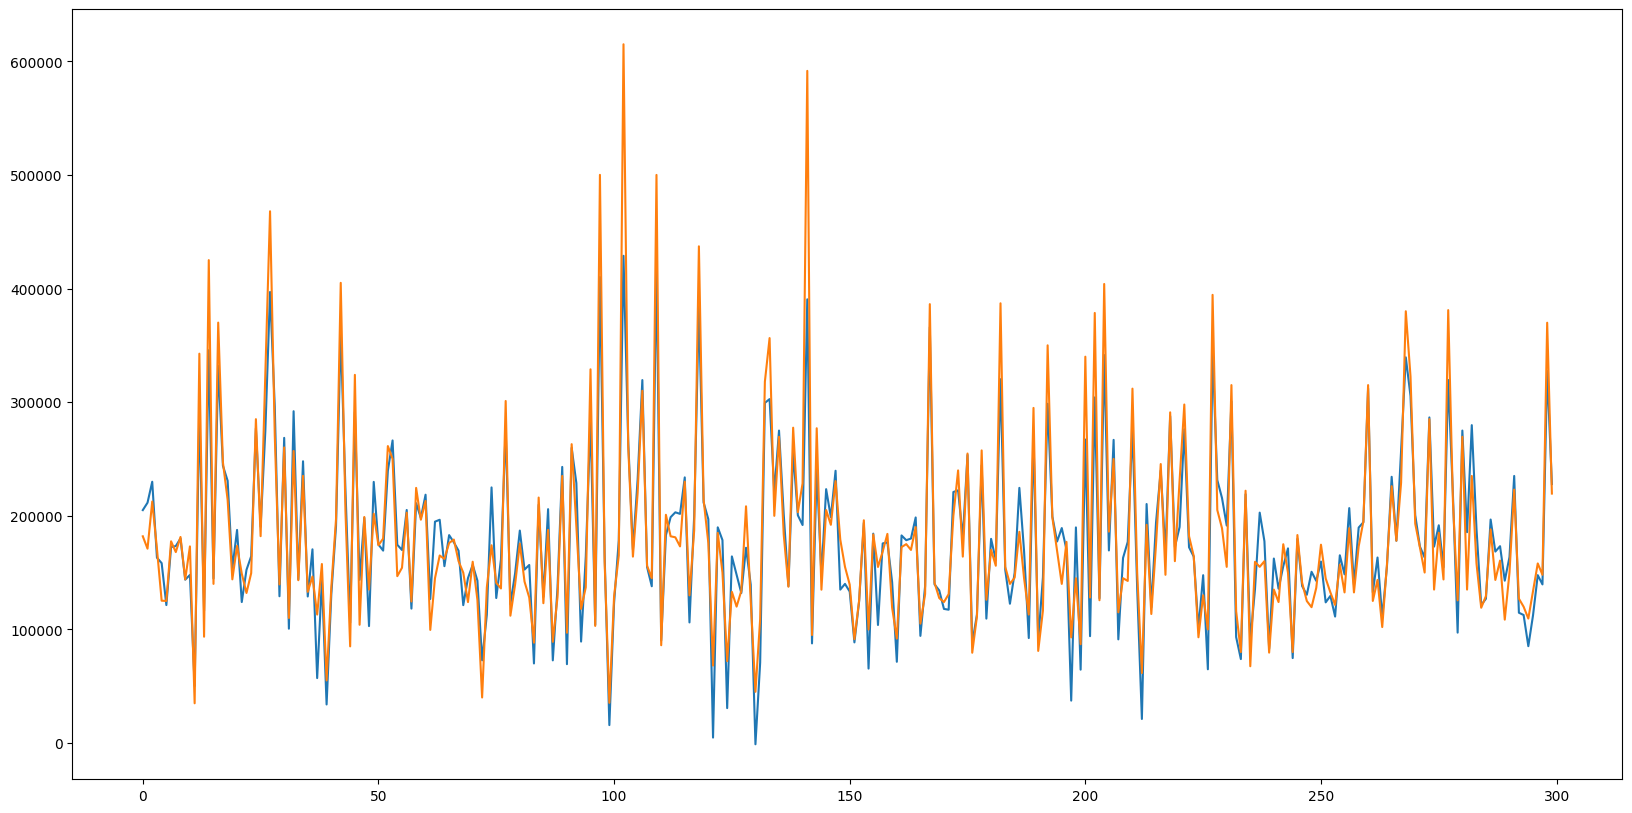

In [168]:
plt.figure(figsize=(20,10))
plt.plot(y_pred)
plt.plot(y_test)


## Conclusions